In [133]:
import os

import librosa
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from pydub import AudioSegment
from scipy import signal
from sklearn import preprocessing

In [134]:
pathAudio = 'C:/Users/Admin/OneDrive/Dokumente/Studium/Technology Lab/Technology Lab Team 4/Techno Titel/train-stochastic/samples/'
files = librosa.util.find_files(pathAudio, ext=['mp3'])
files = sorted(files, key=lambda x: int(x.split('_')[-1].split(".")[0]))

In [136]:
def normalize_sample(sample):
    array_of_samples = sample.get_array_of_samples()
    np_arr = np.array(array_of_samples)
    np_arr = np_arr.reshape(1, -1)
    return preprocessing.normalize(np_arr)

samples = []
samples_sec_canal = []
for file_name in files:
    sample = AudioSegment.from_mp3(file_name)
    mono_samples = sample.split_to_mono()
    normalized_sample = normalize_sample(mono_samples[0])[0]
    resampled_sample = signal.resample(normalized_sample, 1000)
    samples.append(resampled_sample)
    normalized_sample_sec_canal = normalize_sample(mono_samples[1])[0]
    resampled_sample_sec_canal = signal.resample(normalized_sample_sec_canal, 1000)
    samples_sec_canal.append(resampled_sample_sec_canal)

In [137]:
X_train = []
Y_train = []
for i in range(len(samples)):
    Y_train.append(i)
    if i < len(samples) - 1:
        x = list(samples[i])
        y = list(samples[i + 1])
        z = x + y
        X_train.append(z)
    else:
        x = list(samples[i])
        y = list(samples[0])
        z = x + y
        X_train.append(z)

In [138]:
from numpy import random

X_train_false = []


def get_strange_end_part(samples, current_index, max_len):
    x = random.randint(max_len)
    if x != current_index:
        return samples[x]
    else:
        return get_strange_end_part(samples, current_index, max_len)


for i in range(len(samples)):
    first_half = samples[i]
    last_half = get_strange_end_part(samples, i, len(samples))
    new_sample = list(first_half) + list(last_half)
    X_train_false.append(new_sample)

In [139]:
X_train = np.array(X_train)
X_train = X_train.reshape(-1, 2000)

In [140]:
from keras.utils.np_utils  import to_categorical

Y_train = to_categorical(Y_train)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [141]:
Y_train = np.array(Y_train)
Y_train.shape

(151, 151)

In [167]:
X_train = X_train.reshape(-1, 1, 2000)
X_train.shape

(151, 1, 2000)

In [200]:
from keras.layers import Conv1D, Softmax, LSTM, MaxPool1D, Reshape, Flatten

model = Sequential()
'''model.add(Conv1D(filters=10, kernel_size=1, input_shape=(2000, 1)))
model.add(MaxPool1D(pool_size=2, strides=2))
model.add(Softmax())
model.add(Dense(100))
model.add(LSTM(4, activation='sigmoid', return_sequences=True))
model.add(Dense(100, activation='sigmoid'))
model.add(Flatten())
model.add(Softmax())
model.add(Dense(151))'''
model.add(LSTM(20, input_shape=(1, 2000), return_sequences=True))
model.add(Dense(100))
model.add(Flatten())
model.add(Dense(151, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 2000, 10)          20        
                                                                 
 lstm_40 (LSTM)              (None, 2000, 20)          2480      
                                                                 
 dense_61 (Dense)            (None, 2000, 100)         2100      
                                                                 
 flatten_17 (Flatten)        (None, 200000)            0         
                                                                 
 dense_62 (Dense)            (None, 151)               30200151  
                                                                 
Total params: 30,204,751
Trainable params: 30,204,751
Non-trainable params: 0
_________________________________________________________________


In [203]:
model.fit(X_train, Y_train, epochs=200)

Epoch 1/200


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [195]:
example_x_train = X_train[5]
example_x_train = example_x_train.reshape(1, 1, 2000)
model.predict(example_x_train)

array([[5.05625358e-05, 2.82317400e-04, 9.99323249e-01, 3.45159242e-05,
        9.57813859e-03, 1.00000000e+00, 1.28835440e-04, 8.49342108e-01,
        9.88341808e-01, 2.51853466e-03, 9.09791231e-01, 1.17054582e-03,
        8.87838900e-02, 9.99914885e-01, 7.85807610e-01, 1.52786463e-01,
        8.93168926e-01, 9.98165011e-01, 7.81987011e-02, 9.99992728e-01,
        7.94561929e-05, 9.95200932e-01, 8.12252462e-02, 4.04659837e-01,
        1.86641216e-02, 1.93655842e-06, 3.22435647e-01, 4.12814975e-01,
        1.72695190e-01, 9.95992780e-01, 9.36102867e-03, 8.50912273e-01,
        8.85794044e-01, 2.24303901e-02, 9.67413187e-04, 3.45869660e-02,
        3.70919347e-01, 1.12557411e-03, 9.32070613e-03, 3.34531069e-04,
        6.54548407e-04, 7.33443797e-02, 5.14367640e-01, 8.80693972e-01,
        2.03669071e-04, 1.15839175e-04, 8.95518661e-01, 9.99911547e-01,
        6.39017522e-01, 7.56853842e-06, 8.81066442e-01, 9.99989510e-01,
        4.20212746e-04, 4.54809368e-02, 8.83272946e-01, 6.863122

In [196]:
example_x_train = X_train[7]
example_x_train = example_x_train.reshape(1, 1, 2000)
model.predict(example_x_train)

array([[2.89460421e-02, 3.13639641e-04, 7.85211265e-01, 6.73353672e-04,
        2.93140765e-05, 8.52014184e-01, 8.96869540e-01, 1.00000000e+00,
        9.99979615e-01, 4.11242247e-04, 9.31499720e-01, 9.99303341e-01,
        9.00250793e-01, 6.70967817e-01, 5.20766946e-07, 9.98807251e-01,
        9.97382164e-01, 9.99065518e-01, 8.92190695e-01, 9.32662845e-01,
        9.99639750e-01, 2.05895305e-03, 9.99941409e-01, 1.06878012e-01,
        5.85072803e-06, 7.68547654e-01, 7.30983317e-01, 2.15589732e-01,
        7.73084164e-03, 9.92666602e-01, 3.19123060e-01, 1.00177228e-02,
        3.44416112e-05, 4.88139838e-01, 9.79641259e-01, 8.00197482e-01,
        5.78889251e-03, 3.53327394e-03, 8.74279022e-01, 9.56257343e-01,
        8.29092264e-02, 1.80909038e-03, 9.99931216e-01, 9.97920573e-01,
        7.26963282e-02, 3.18787664e-01, 9.99980509e-01, 1.06116802e-01,
        8.12076569e-01, 3.69116634e-01, 2.84808874e-03, 5.09186089e-02,
        9.99935687e-01, 9.84859943e-01, 1.95307910e-01, 2.025574

In [199]:
example_x_train = X_train_false[0]
example_x_train = np.array(example_x_train)
example_x_train = example_x_train.reshape(1, 1, 2000)
model.predict(example_x_train)

array([[9.9999440e-01, 9.9819219e-01, 3.7700534e-03, 2.6171565e-02,
        9.2414021e-04, 4.7521958e-01, 1.4454126e-04, 2.0880997e-01,
        3.6584139e-03, 9.9998486e-01, 2.9977232e-02, 9.5517933e-01,
        9.9869335e-01, 1.1635235e-04, 1.6582161e-02, 5.0780648e-01,
        3.0966780e-06, 6.7374170e-01, 4.3985584e-01, 9.6849132e-01,
        3.0415303e-01, 2.7847290e-04, 1.0326421e-01, 9.9998641e-01,
        9.6492672e-01, 7.5740838e-01, 4.9542664e-06, 9.9999899e-01,
        2.9047549e-01, 7.5548887e-04, 2.7765334e-03, 9.9999970e-01,
        2.2514758e-01, 1.0160461e-01, 2.6941189e-01, 9.9989605e-01,
        3.1826401e-01, 9.9963057e-01, 2.4247044e-01, 7.4364614e-01,
        9.4046479e-01, 3.1184980e-01, 2.5558364e-01, 3.5479665e-04,
        7.2683036e-01, 1.1827350e-03, 5.1647425e-04, 5.2961113e-08,
        1.5649796e-03, 9.9613488e-01, 7.1651030e-01, 2.0390570e-02,
        9.4345838e-02, 1.4625886e-06, 9.9448282e-01, 6.6059607e-01,
        5.7894969e-01, 6.1434478e-02, 9.0513325e

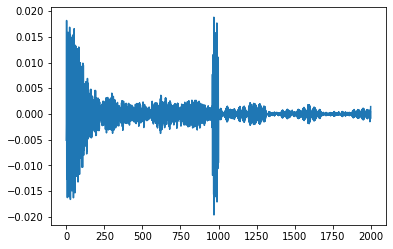

In [149]:
plt.plot(X_train[15])
plt.show()